## Project:


In this project we will load MNIST data, train it using a 2-conv-1 fully connected layer. We will then extract features from the trained model for a  subset of test data and perform t-sne on it. We will visualise features. For part-2 of the project we would load an image, make predictions based on inception and explain the predictions using LIME.



1. Load MNIST data.<br>
2. Preprocess data.
2. Train a neural network.
3. Extract features  for 10000 samples from final layer and perform tsne.
4. Visualise filters/activations.
5. LIME based explanation.(For inception network)



In [1]:

# Reference

## Load matplotlib for plots and tensorflow our main workhorse
import matplotlib.pyplot as plot
%matplotlib inline

#requires a stable version of tensorflow 1.14
import tensorflow as tf
import numpy as np

## Step 1 (Load MNIST data):

Load required modules from keras. Since we need this model to be used with LIME, convert the gray scale MNIST data to rgb using rgb2gray transformation from scikitimage.



In [2]:
#Import required modules.
from __future__ import print_function
import keras
import tensorflow as tf

from keras import Model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from skimage.color import gray2rgb, rgb2gray, label2rgb

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 3)

    

Using TensorFlow backend.


In [3]:
# Prepare training and test data
x_train = np.stack([gray2rgb(x_train[i].reshape(28,28)) for i  in range(x_train.shape[0])],0)
x_test = np.stack([gray2rgb(x_test[i].reshape(28,28)) for i  in range(x_test.shape[0])],0)

In [4]:
x_test.shape

(10000, 28, 28, 3)

## Step 2 : (Preprocessing)

Normalise the data to be in 0-1 range by dividing it by 255.
Convert the labels to one-hot encoding using keras.utils.to_categorical

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 3)
60000 train samples
10000 test samples


## Step 3 : Model creation:

Create a keras model that has 32 - 3*3 filters in first layer and 64 3 * 3 filters in second layer, followed by a fully connected layer with 128 neurons and train the model.

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

W1110 20:46:36.688435 139981287565120 deprecation_wrapper.py:119] From /home/peerless/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1110 20:46:36.704279 139981287565120 deprecation_wrapper.py:119] From /home/peerless/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1110 20:46:36.706041 139981287565120 deprecation_wrapper.py:119] From /home/peerless/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1110 20:46:36.723394 139981287565120 deprecation_wrapper.py:119] From /home/peerless/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.2379 - acc: 0.9264 - val_loss: 0.0492 - val_acc: 0.9833
Epoch 2/12
60000/60000 [==============================] - 3s 52us/step - loss: 0.0806 - acc: 0.9758 - val_loss: 0.0417 - val_acc: 0.9861
Epoch 3/12
60000/60000 [==============================] - 3s 54us/step - loss: 0.0599 - acc: 0.9820 - val_loss: 0.0322 - val_acc: 0.9884
Epoch 4/12
60000/60000 [==============================] - 3s 54us/step - loss: 0.0526 - acc: 0.9845 - val_loss: 0.0285 - val_acc: 0.9902
Epoch 5/12
60000/60000 [==============================] - 3s 54us/step - loss: 0.0441 - acc: 0.9865 - val_loss: 0.0275 - val_acc: 0.9906
Epoch 6/12
60000/60000 [==============================] - 3s 54us/step - loss: 0.0379 - acc: 0.9886 - val_loss: 0.0260 - val_acc: 0.9913
Epoch 7/12
60000/60000 [==============================] - 3s 54us/step - loss: 0.0342 - acc: 0.9896 - val_loss: 0.0263 - val_acc

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [8]:
model.save_weights('cnn_1.h5')

# Step 4: Extract features and perform t-sne

Identify the layer to extract features and create a new keras model whose predictions are features from the fully connected layers.

In [9]:
model.layers[5].output

<tf.Tensor 'dense_1/Relu:0' shape=(?, 128) dtype=float32>

In [10]:

# Create an model that has final layer features as output.
 
activations_model = Model(inputs=model.inputs, outputs=model.layers[5].output) 

In [11]:
activations_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
Total para

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
x_test.shape

(10000, 28, 28)

In [14]:
x_select = x_test[:1000]
x_select.shape

(1000, 28, 28)

In [15]:
y_select = y_test[:1000]
y_select[1]

2

In [16]:
x_select = np.stack([gray2rgb(x_select[i].reshape(28,28)) for i  in range(x_select.shape[0])],0)
x_select.shape

(1000, 28, 28, 3)

In [17]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

In [18]:
# test_set_features = []

for image in x_select:
    cnn_features = activations_model.predict(x_select)

Perform tsne on extracted features and reduce it to two dimensions. Plot the transformed data labelled by their respective class and comment on the output.

In [19]:
X1 = TSNE(n_components=2,perplexity=20).fit_transform(cnn_features) ## creates a tsne object and passes input data in to it

/home/peerless/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


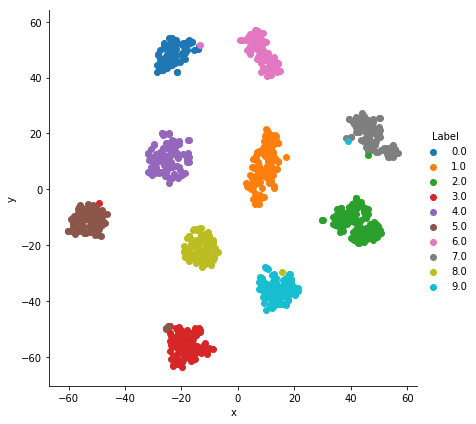

In [20]:

#lets store the data with their labels
embedding_data = np.vstack((X1.T, y_select)).T
#convert in to a dataframe to ease plotting
embedding_data_df = pd.DataFrame(embedding_data, columns=("x","y","Label"))

# do a scatter plot with the color(hue) specified by the label value
sns.FacetGrid(embedding_data_df, hue="Label", size=6).map(plot.scatter, "x", "y").add_legend()

In [21]:
for layers in model.layers:
    print(layers.output)

Tensor("conv2d_1/Relu:0", shape=(?, 26, 26, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 24, 24, 64), dtype=float32)
Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 12, 12, 64), dtype=float32)
Tensor("dropout_1/cond/Merge:0", shape=(?, 12, 12, 64), dtype=float32)
Tensor("flatten_1/Reshape:0", shape=(?, ?), dtype=float32)
Tensor("dense_1/Relu:0", shape=(?, 128), dtype=float32)
Tensor("dropout_2/cond/Merge:0", shape=(?, 128), dtype=float32)
Tensor("dense_2/Softmax:0", shape=(?, 10), dtype=float32)


## Step 5: Visualise the features from first layer and comment on the output.

Extract the features from first layer and visualise some of them.

In [27]:
filters, biases = model.layers[1].get_weights()

In [28]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

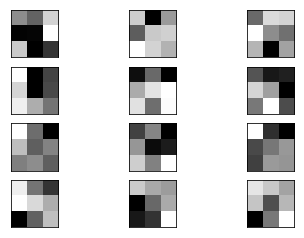

In [29]:
num_filters,index = 4,1

for i in range(num_filters):
    f = filters[:,:,:,i]
    for j in range(3):
        ax = plot.subplot(num_filters,3,index)
        ax.imshow(f[:,:,j],cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        index+=1
plot.show()

# Part-2 Explaining predictions using LIME.

Task :

Load the image 'riding-dog.png' from images directory, transform it to match the network input using the helper function given below. Load the inception network and make predictions for the given image. Determine the most important region for each of top-3 predictions.

In [30]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions

from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
from lime import lime_image
%matplotlib inline
import numpy as np
from skimage.io import imread
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.2.4


In [31]:
## Helper function for transforming an image according to inception network.

def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        ## Inception model requires image of size (299,299)
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0) ##modify it as if the batch size is 1
        x = inc_net.preprocess_input(x) ## call inception model specific preprocessing.
        out.append(x)
    return np.vstack(out)

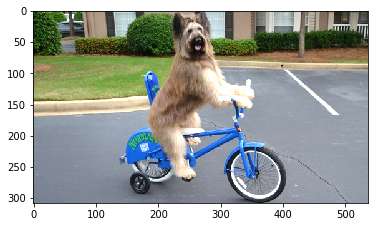

In [32]:
## Loads the image
image_path = '../images/riding-dog.png'
im_display = imread(image_path)
plt.imshow(im_display)

In [33]:
## Load the model

inet_model = inc_net.InceptionV3()

W1110 20:47:52.407387 139981287565120 deprecation_wrapper.py:119] From /home/peerless/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W1110 20:47:53.044782 139981287565120 deprecation_wrapper.py:119] From /home/peerless/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



In [34]:

images = transform_img_fn([image_path])
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

('n02105251', 'briard', 0.937442)
('n02096177', 'cairn', 0.0057051824)
('n02835271', 'bicycle-built-for-two', 0.0013559192)
('n02098105', 'soft-coated_wheaten_terrier', 0.001133476)
('n02106382', 'Bouvier_des_Flandres', 0.0009498867)


In [35]:

explainer = lime_image.LimeImageExplainer()

In [36]:
explanation = explainer.explain_instance(images[0], inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

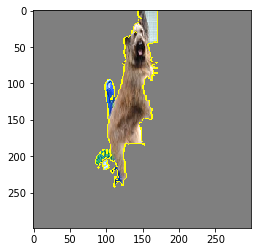

In [37]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

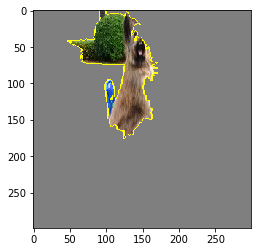

In [38]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

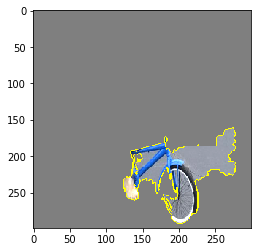

In [39]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[2], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))